In [1]:
import sys
sys.path.append('../src/')

In [2]:
# Third-party libraries:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# My libraries:
import dataset.dataset as dtset
from dbclass import dbclass_utils as db_utils

In [3]:
# import some data to play with
ds = load_breast_cancer()
# Splitting the data for trainning and for test:
ds_train, ds_validation = dtset.split_data(ds, prop_train=0.5)
ds_validation, ds_test = dtset.split_data(ds_validation, prop_train=0.5)
ds_train = dtset.join_data((ds_train, ds_validation))

In [4]:
# Train a SVM classification model
# Fitting the classifier to the training set:
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
                'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'),
                    param_grid, cv=5)
clf = clf.fit(ds_train['data'], ds_train['target'])
print("\nBest estimator found by grid search:")
print(clf.best_estimator_)


Best estimator found by grid search:
SVC(C=1000.0, class_weight='balanced', gamma=0.0001)


              precision    recall  f1-score   support

   malignant       0.38      0.91      0.53        53
      benign       0.93      0.90      0.92        90
     Unknown       0.00      0.00      0.00        71

    accuracy                           0.60       214
   macro avg       0.44      0.60      0.48       214
weighted avg       0.49      0.60      0.52       214


Confusion matrix:
[[22.43  2.34  0.  ]
 [ 4.21 37.85  0.  ]
 [32.71  0.47  0.  ]]
accuracy 0.60274


C:\Users\weldl\Miniconda3\envs\dbclass\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\weldl\Miniconda3\envs\dbclass\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\weldl\Miniconda3\envs\dbclass\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


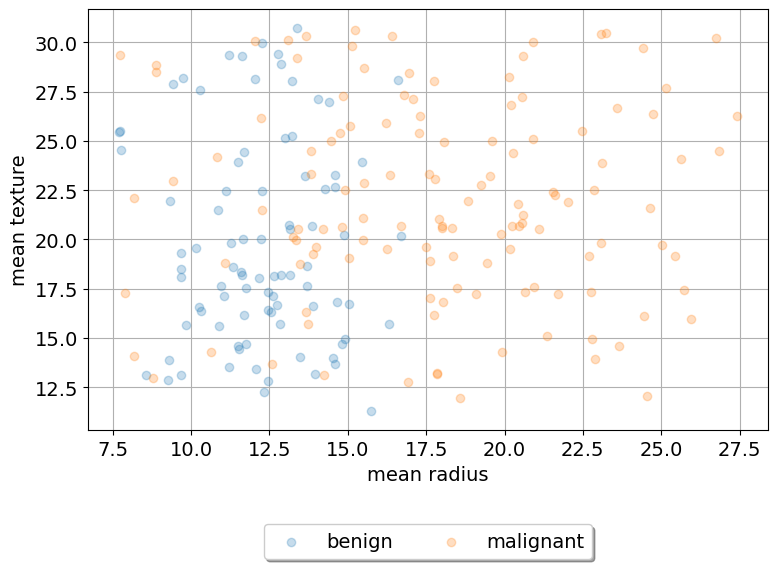

In [5]:
# Quantitative evaluation of the model quality on the test set:
ds_test = dtset.insert_rand_noclass(ds_test)
y_pred = clf.predict(ds_test['data'])
ds_pred = db_utils.print_classification_report(ds_test, y_pred)
confusion_matrix = db_utils.build_confusion_matrix(ds_test['target'], y_pred)
print('\nConfusion matrix:')
print(confusion_matrix)
class_metrics = db_utils.get_class_metrics(confusion_matrix)
for metric in class_metrics.keys():
    print(metric, class_metrics[metric])
dtset.plot_dataset(ds_pred, feat_index=(0, 1), labeled=True, fig_name="model test")
